# Natural Language Processing with Disaster Tweets


## Overview/ Description of Problem and Data

This project is from Kaggle competitions[https://www.kaggle.com/competitions/nlp-getting-started/overview]. I will use natural language processing to classify the tweets from dataset are either non-disaster related or disaster related. The dataset are tweets and featured with text, location, and keyword. After inspecting, cleaning and preprocessing the dataset,  all special characters and url will be removed and ready to process.


In [88]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation, digits, printable
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
color = ['#247BA0', '#F6511D', '#7FB800', '#FFB400', '#F25F5C', '#50514F']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data



In [27]:
Train_data = pd.read_csv("./sample_data/train.csv")
Test_data = pd.read_csv("./sample_data/test.csv")
Submission = pd.read_csv("./sample_data/sample_submission.csv")
print(Train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [28]:
Train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [29]:
print(Train_data.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [30]:

from random import sample
rows = sample([i for i in range(7613)], 5)
Train_data.iloc[rows, :]

,id,keyword,location,text,target
3967,5638,flooding,"California, USA",So grateful for all the support flooding in fr...,1
222,315,annihilated,NaN,@AmirKingKhan you would have been annihilated ...,0
2273,3260,demolish,State of Dreaming,Just us four can demolish this?? @Createduniqu...,0
2211,3167,deluge,Melbourne-ish,Despite the deluge of #FantasticFour notices o...,0
3404,4874,explode,"New Orleans, Louisiana",See these guys reaching the front foot out loa...,0


There are total 7613 observations with no missing values in the dataset. 

In [31]:
# Remove keyword and location features abd update both test and train datasets
Train_Tweets = Train_data[["id", "text", "target"]].sort_values(by = "id")
Test_Tweets = Test_data[["id", "text"]].sort_values(by = "id")

# Update the training dataframe
Train_Tweets.iloc[rows]

,id,text,target
3967,5638,So grateful for all the support flooding in fr...,1
222,315,@AmirKingKhan you would have been annihilated ...,0
2273,3260,Just us four can demolish this?? @Createduniqu...,0
2211,3167,Despite the deluge of #FantasticFour notices o...,0
3404,4874,See these guys reaching the front foot out loa...,0


Text(0.5, 1.0, 'Non Disaster Word Count')

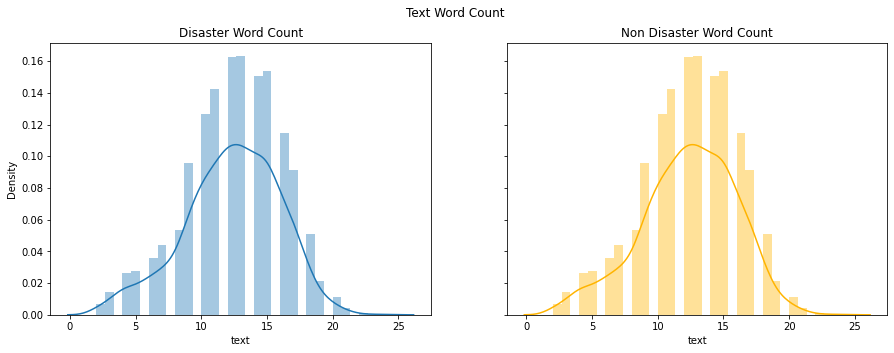

In [54]:



Count_Word = Train_Tweets[Train_Tweets['target'] == 1]['text'].str.split(' ').str.len()

fig, axes = plt.subplots( 1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Tweets Word Count')

# Disaster Word Count
sns.distplot(Count_Word, ax = axes[0])
axes[0].set_title('Disaster Word Count')

sns.distplot(Count_Word, ax = axes[1], color = color[3])
axes[1].set_title('Non Disaster Word Count')

In [32]:
# Apply NLP to the reviews.
def fix_stopwords(ds: pd.Series) -> pd.Series: 
    
    for n in range(len(ds)):
        if n % 1000 == 0: 
            print(n)
        Words = re.sub('[^a-zA-Z]', ' ', Data_Word[m])                                      
        Words = (Words.lower()).split()
        Words = [i for i in main_words if not i in set(stopwords.words('english'))]  

        lem = WordNetLemmatizer()
        Words = [lem.lemmatize(i) for i in Words if len(i) > 1]                    
        Words = ' '.join(Words)
        Data_Word[n] = Words

    return Data_Word

#Clean up stopwords from test and train
Train_Tweets["text"] = fix_stopwords(Train_Tweets["text"])
Test_Tweets["text"] = fix_stopwords(Test_Tweets["text"])

0
1000
2000
3000
4000
5000
6000
7000
0
1000
2000
3000


In [33]:

Corpus = Train_Tweets["text"].tolist()
Vector = TfidfVectorizer(max_features=1000)
Response = vector.fit(Corpus)

Val = Response.transform(Train_Tweets["text"]).todense()

X_train, X_val, y_train, y_val = train_test_split(Val, Train_Tweets["target"], test_size=0.08, random_state=42)

X_test = Response.transform(Test_Tweets["text"]).todense()


print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape)

(7003, 1000) (610, 1000) (3263, 1000)
(7003,) (610,)


## Model Architecture


In [63]:
model = Sequential([
    layers.Embedding(3000, 64, input_length = 1000),
    layers.Dropout(0.3),
    layers.LSTM(100, dropout = 0.3, return_sequences = True, recurrent_dropout = 0.4),
    layers.Dropout(0.3),
    layers.LSTM(100, dropout = 0.3, recurrent_dropout = 0.4),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = keras.optimizers.Adam(0.0005),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 64)          192000    
                                                                 
 dropout_19 (Dropout)        (None, 1000, 64)          0         
                                                                 
 lstm_2 (LSTM)               (None, 1000, 100)         66000     
                                                                 
 dropout_20 (Dropout)        (None, 1000, 100)         0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                

In [65]:
callback = EarlyStopping(monitor='val_loss', patience = 3)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 0.001)
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, callbacks = [callback, reduce_lr])

Epoch 1/10
176/176 [==============================] - 775s 4s/step - loss: 0.6829 - accuracy: 0.5739 - val_loss: 0.6855 - val_accuracy: 0.5625 - lr: 5.0000e-04
Epoch 2/10
176/176 [==============================] - 764s 4s/step - loss: 0.6833 - accuracy: 0.5741 - val_loss: 0.6854 - val_accuracy: 0.5625 - lr: 5.0000e-04
Epoch 3/10
176/176 [==============================] - 743s 4s/step - loss: 0.6831 - accuracy: 0.5741 - val_loss: 0.6855 - val_accuracy: 0.5625 - lr: 5.0000e-04
Epoch 4/10
176/176 [==============================] - 734s 4s/step - loss: 0.6829 - accuracy: 0.5741 - val_loss: 0.6855 - val_accuracy: 0.5625 - lr: 5.0000e-04
Epoch 5/10
176/176 [==============================] - 746s 4s/step - loss: 0.6829 - accuracy: 0.5741 - val_loss: 0.6854 - val_accuracy: 0.5625 - lr: 5.0000e-04


 ## Results and Analysis

In [67]:
history.history

{'loss': [0.6828877925872803,
  0.6833112239837646,
  0.6830788254737854,
  0.6828615069389343,
  0.6828737854957581],
 'accuracy': [0.5739021897315979,
  0.5740807056427002,
  0.5740807056427002,
  0.5740807056427002,
  0.5740807056427002],
 'val_loss': [0.6855012774467468,
  0.6853928565979004,
  0.6854603886604309,
  0.6855490803718567,
  0.6854026913642883],
 'val_accuracy': [0.562455415725708,
  0.562455415725708,
  0.562455415725708,
  0.562455415725708,
  0.562455415725708],
 'lr': [0.0005, 0.0005, 0.0005, 0.0005, 0.0005]}

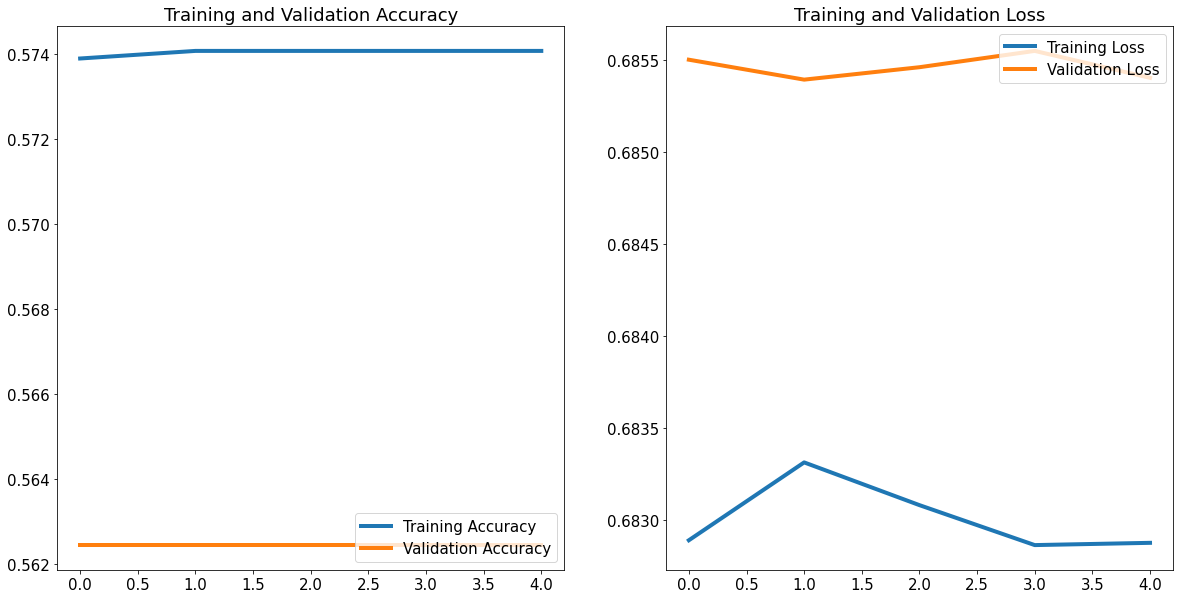

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.rc('font', size = 15)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth = 4)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linewidth = 4)

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth = 4)
plt.plot(epochs_range, val_loss, label='Validation Loss', linewidth = 4)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
Test_res = pd.read_csv('/content/sample_data/test.csv')
Test_res['clean_text'] = Test_res['text'].str.lower() 
stop_words = list(stopwords.words('english'))  
Res = WordNetLemmatizer()
Clean_List = []

for i in Test_res['clean_text']:
    Temp = [lemmatizer.lemmatize(word) for w in row.split() if w not in stop_words]
    Temp = ' '.join(clean_temp)
    Temp = re.sub(r'http\S+', '', clean_temp) 
    Temp = re.sub(r'@\S+', 'mention_user', clean_temp) 
    Temp_clean = [n for n in Temp if n not in list(punctuation) and n in list(printable)  and n not in list(digits)]
    Temp = ''.join(Temp_clean)
    Clean_List.append(Temp)
Test_res['clean_text'] = pd.Series(Clean_List)
Res_temp = Tokenizer(num_words = 3000, split=' ') 
Res_temp.fit_on_texts(test_df['clean_text'].values)


In [90]:
X_Res = tokenizer.texts_to_sequences(test_df['clean_text'].values)
X_Res = pad_sequences(X_Res, maxlen = 1000)
y_Res = model.predict(X_Res)
Res_Data = pd.DataFrame(test_df['id'], columns =['id'])
Res_Data['target'] = np.round(y_Res).astype(int).reshape(3263)
Res_Data.to_csv('ResPreData.csv', index = False)

102/102 [==============================] - 52s 514ms/step


## Conclusion

In this project I try to classify tweets as either disaster or not disaster, and train model in order to predit disaster from tweets. The accuracy of the model I build with the training data are steady through running epochs. There will be many other methods to tune the model and get a better result, but considering the consume of time, in this project I just do little work to make the model fit well.
One thing I would like to impove in this project is the model isn't generalized well because there are much noise in the text, I shoudl do more steps in cleaning text. Overall, I learned a lot about using basic natural language processing for analysis text in this project. 


